# Data Cleaning, Integration, and Visualisation

## 1. malicious_phish Kaggle Dataset Visualisation

In [117]:
import pandas as pd
dataset = pd.read_csv("D:/Data Science/Project/link detection/url_checker/dataset/malicious_phish.csv")
print(dataset)

                                                      url        type
0                                        br-icloud.com.br    phishing
1                     mp3raid.com/music/krizz_kaliko.html      benign
2                         bopsecrets.org/rexroth/cr/1.htm      benign
3       http://www.garage-pirenne.be/index.php?option=...  defacement
4       http://adventure-nicaragua.net/index.php?optio...  defacement
...                                                   ...         ...
651186            xbox360.ign.com/objects/850/850402.html    phishing
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/    phishing
651188         www.gamespot.com/xbox360/action/deadspace/    phishing
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)    phishing
651190          www.angelfire.com/goth/devilmaycrytonite/    phishing

[651191 rows x 2 columns]


In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
labels = np.array(dataset.type.unique())
labels.sort()
labels

array(['benign', 'defacement', 'malware', 'phishing'], dtype=object)

In [82]:
counts = dataset.groupby(['type']).count()
print(counts)

               url
type              
benign      428103
defacement   96457
malware      32520
phishing     94111


In [83]:
counts = np.array(counts).reshape(-1)
counts

array([428103,  96457,  32520,  94111], dtype=int64)

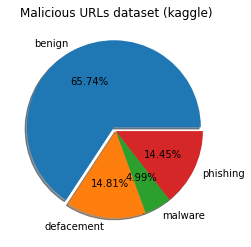

In [93]:
plt.pie(np.array(counts),explode=[0.05,0,0,0], labels=labels, autopct='%1.2f%%',shadow=True )
plt.title("Malicious URLs dataset (kaggle)")
plt.show()

#### covert labels in two categories, danger and safe.

In [86]:
dataset['type'] = np.where(dataset['type']=='benign','safe','danger')
dataset

,url,type
0,br-icloud.com.br,danger
1,mp3raid.com/music/krizz_kaliko.html,safe
2,bopsecrets.org/rexroth/cr/1.htm,safe
3,http://www.garage-pirenne.be/index.php?option=...,danger
4,http://adventure-nicaragua.net/index.php?optio...,danger
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,danger
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,danger
651188,www.gamespot.com/xbox360/action/deadspace/,danger
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),danger


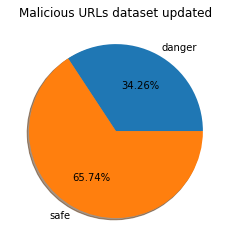

In [100]:
plt.pie(np.array(dataset.groupby(['type']).count()).reshape(-1), labels=['danger','safe'], autopct='%1.2f%%',shadow=True )
plt.title("Malicious URLs dataset updated")
plt.show()

## 2. Clean and add URLhause phising links to datase 

In [57]:
dataset2 = pd.read_csv("D:/Data Science/Project/link detection/url_checker/dataset/urlhause_links.csv")
dataset2

,url
0,http://117.216.22.215:40288/Mozi.m
1,http://117.212.172.53:47514/Mozi.m
2,http://117.216.3.221:54646/Mozi.m
3,http://123.5.126.245:36562/Mozi.m
4,http://182.124.147.217:50588/bin.sh
...,...
140221,http://58.230.89.42:34092/.i
140222,http://63.245.122.93:29703/.i
140223,http://123.194.235.37:49320/.i
140224,http://da.alibuf.com:3/445.exe


In [58]:
labels_temp = pd.DataFrame(["danger" for i in range(len(dataset2))])

In [59]:
dataset2 = pd.concat([dataset2,labels_temp], axis=1)

In [78]:
dataset2.rename(columns={0:'type'},inplace=True)
dataset2

,url,type
0,http://117.216.22.215:40288/Mozi.m,danger
1,http://117.212.172.53:47514/Mozi.m,danger
2,http://117.216.3.221:54646/Mozi.m,danger
3,http://123.5.126.245:36562/Mozi.m,danger
4,http://182.124.147.217:50588/bin.sh,danger
...,...,...
140221,http://58.230.89.42:34092/.i,danger
140222,http://63.245.122.93:29703/.i,danger
140223,http://123.194.235.37:49320/.i,danger
140224,http://da.alibuf.com:3/445.exe,danger


## 3. Integrate Both Datasets

In [98]:
df = pd.concat([dataset,dataset2], axis=0)
df = df.sample(frac=1).reset_index(drop=True)
df

,url,type
0,http://95.214.24.120/C/2.txt,danger
1,http://valleyobgynassociates.com/wp-content/vp3,danger
2,http://112.248.152.255:57033/Mozi.m,danger
3,classmates.com/directory/public/memberprofile/...,safe
4,moneytalks.com/main.htm?id=,safe
...,...,...
791412,http://paypal.com.secure.information.vineyarda...,danger
791413,local.yahoo.com/info-18276551-st-paul-s-episco...,safe
791414,nps.gov/fone/historyculture/index.htm,safe
791415,culinaryinstitutemi.com/faculty/jamie-leroux/,safe


In [99]:
df.describe()

,url,type
count,791417,791417
unique,781332,2
top,http://style.org.hc360.com/css/detail/mysite/s...,safe
freq,180,428103


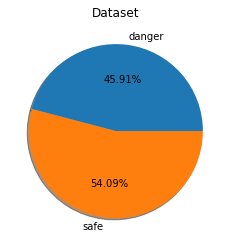

In [101]:
plt.pie(np.array(df.groupby(['type']).count()).reshape(-1), labels=['danger','safe'], autopct='%1.2f%%',shadow=True )
plt.title("Dataset")
plt.show()

Drop Duplicates and NULL values

In [110]:
df = df.drop_duplicates(subset=['url'])
df = df.dropna().reset_index(drop=True)
df

,url,type
0,http://95.214.24.120/C/2.txt,danger
1,http://valleyobgynassociates.com/wp-content/vp3,danger
2,http://112.248.152.255:57033/Mozi.m,danger
3,classmates.com/directory/public/memberprofile/...,safe
4,moneytalks.com/main.htm?id=,safe
...,...,...
781327,http://paypal.com.secure.information.vineyarda...,danger
781328,local.yahoo.com/info-18276551-st-paul-s-episco...,safe
781329,nps.gov/fone/historyculture/index.htm,safe
781330,culinaryinstitutemi.com/faculty/jamie-leroux/,safe


In [111]:
df.describe()

,url,type
count,781332,781332
unique,781332,2
top,http://95.214.24.120/C/2.txt,safe
freq,1,428076


## 4. Final datset visualisation

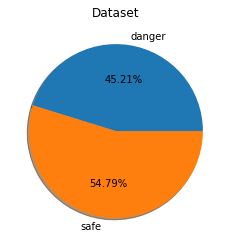

In [112]:
plt.pie(np.array(df.groupby(['type']).count()).reshape(-1), labels=['danger','safe'], autopct='%1.2f%%',shadow=True )
plt.title("Dataset")
plt.show()

## 5. label encoding 

In [114]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
df['type'] = lb.fit_transform(df['type'])
df

,url,type
0,http://95.214.24.120/C/2.txt,0
1,http://valleyobgynassociates.com/wp-content/vp3,0
2,http://112.248.152.255:57033/Mozi.m,0
3,classmates.com/directory/public/memberprofile/...,1
4,moneytalks.com/main.htm?id=,1
...,...,...
781327,http://paypal.com.secure.information.vineyarda...,0
781328,local.yahoo.com/info-18276551-st-paul-s-episco...,1
781329,nps.gov/fone/historyculture/index.htm,1
781330,culinaryinstitutemi.com/faculty/jamie-leroux/,1


In [115]:
# we can observe that "http://95.214.24.120/C/2.txt" was danger and after encoding it is 0, so 0=attack and 1=safe

Save Final Dataset

In [116]:
df.to_csv("D:/Data Science/Project/link detection/url_checker/dataset/df_final.csv",index=False)